<a href="https://colab.research.google.com/github/sjhd1109/study/blob/main/german%20credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Computations
import pandas as pd
import numpy as np

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
import keras.backend as K

# Visualisation libraries

## Text
from IPython.display import Image, display, Markdown, Latex

## seaborn
import seaborn as sns
sns.set_context('paper', rc={'font.size':12,'axes.titlesize':14,'axes.labelsize':12})
sns.set_style('white')

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
import matplotlib.colors
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

## plotly
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
from plotly import tools
import plotly.express as px
import plotly.figure_factory as ff
# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive 
drive.mount('/content/drive') # 새로운 창에서 key 를 받아서 입력해야합니다. 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
filename = '/content/drive/MyDrive/대학원 자료/GermanCredit.csv'

In [13]:
#pandas read_csv로 불러오기
Data = pd.read_csv(filename, index_col=0)
Data.head()

,goodbad,checking,duration,history,purpose,amount,savings,employed,installp,martial,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
0,good,2,9,5,3,1919,1,4,4,3,1,3,3,35,3,1,1,3,1,2,1
1,bad,1,18,3,1,1216,1,2,4,2,1,3,3,23,3,1,1,3,1,2,1
2,good,4,6,5,4,1382,1,3,1,2,1,1,3,28,3,2,2,3,1,2,1
3,good,4,12,3,1,1101,1,3,3,4,1,2,1,27,3,2,2,3,1,2,1
4,good,1,18,3,1,2249,2,4,4,3,1,3,3,30,3,2,1,4,2,2,1


In [15]:
def Data_info(Inp, Only_NaN = False):
    Out = Inp.dtypes.to_frame(name='Data Type').sort_values(by=['Data Type'])
    Out = Out.join(Inp.isnull().sum().to_frame(name = 'Number of NaN Values'), how='outer')
    Out['Percentage'] = np.round(100*(Out['Number of NaN Values']/Inp.shape[0]),2)
    if Only_NaN:
        Out = Out.loc[Out['Number of NaN Values']>0]
    return Out
#
print('The Dataset:')
display(Data.head())
print('Nan Values:')
display(Data_info(Data))
print('Dataset Shape:')
display(pd.DataFrame([Data.shape], columns = ['Instances','Attributes'],index = ['Dataset']))

The Dataset:


,goodbad,checking,duration,history,purpose,amount,savings,employed,installp,martial,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
0,good,2,9,5,3,1919,1,4,4,3,1,3,3,35,3,1,1,3,1,2,1
1,bad,1,18,3,1,1216,1,2,4,2,1,3,3,23,3,1,1,3,1,2,1
2,good,4,6,5,4,1382,1,3,1,2,1,1,3,28,3,2,2,3,1,2,1
3,good,4,12,3,1,1101,1,3,3,4,1,2,1,27,3,2,2,3,1,2,1
4,good,1,18,3,1,2249,2,4,4,3,1,3,3,30,3,2,1,4,2,2,1


Nan Values:


,Data Type,Number of NaN Values,Percentage
age,int64,0,0.0
amount,int64,0,0.0
checking,int64,0,0.0
coapp,int64,0,0.0
depends,int64,0,0.0
duration,int64,0,0.0
employed,int64,0,0.0
existcr,int64,0,0.0
foreign,int64,0,0.0
goodbad,object,0,0.0


Dataset Shape:


,Instances,Attributes
Dataset,1000,21


In [16]:
Data['goodbad'] = Data['goodbad'].map(lambda x: x.title())
Data.columns = [x.title() for x in Data.columns]
Data.head()

,Goodbad,Checking,Duration,History,Purpose,Amount,Savings,Employed,Installp,Martial,Coapp,Resident,Property,Age,Other,Housing,Existcr,Job,Depends,Telephon,Foreign
0,Good,2,9,5,3,1919,1,4,4,3,1,3,3,35,3,1,1,3,1,2,1
1,Bad,1,18,3,1,1216,1,2,4,2,1,3,3,23,3,1,1,3,1,2,1
2,Good,4,6,5,4,1382,1,3,1,2,1,1,3,28,3,2,2,3,1,2,1
3,Good,4,12,3,1,1101,1,3,3,4,1,2,1,27,3,2,2,3,1,2,1
4,Good,1,18,3,1,2249,2,4,4,3,1,3,3,30,3,2,1,4,2,2,1


In [17]:
if Data.Age.min() < 14:
    bins = pd.IntervalIndex.from_tuples([(0, 14), (14, 24), (24, 64),(64, Data.Age.max())])
else:
    bins = pd.IntervalIndex.from_tuples([(14, 24), (24, 64),(64, Data.Age.max())])
Data['Age Category'] = pd.cut(Data['Age'], bins).astype(str).\
                        replace({'(14, 24]':'Youth', '(24, 64]':'Adults','(64, 75]':'Seniors'})
Data.head()

,Goodbad,Checking,Duration,History,Purpose,Amount,Savings,Employed,Installp,Martial,Coapp,Resident,Property,Age,Other,Housing,Existcr,Job,Depends,Telephon,Foreign,Age Category
0,Good,2,9,5,3,1919,1,4,4,3,1,3,3,35,3,1,1,3,1,2,1,Adults
1,Bad,1,18,3,1,1216,1,2,4,2,1,3,3,23,3,1,1,3,1,2,1,Youth
2,Good,4,6,5,4,1382,1,3,1,2,1,1,3,28,3,2,2,3,1,2,1,Adults
3,Good,4,12,3,1,1101,1,3,3,4,1,2,1,27,3,2,2,3,1,2,1,Adults
4,Good,1,18,3,1,2249,2,4,4,3,1,3,3,30,3,2,1,4,2,2,1,Adults


In [19]:
Data_Type = Data_info(Data).iloc[:,:1]
display(Data_Type.T)
Temp = Data_Type.loc[Data_Type['Data Type'] == 'object'].index.tolist()
print('Categorical Features:',' %s:'
      % ', '.join(Temp))

,Age,Age Category,Amount,Checking,Coapp,Depends,Duration,Employed,Existcr,Foreign,Goodbad,History,Housing,Installp,Job,Martial,Other,Property,Purpose,Resident,Savings,Telephon
Data Type,int64,object,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


Categorical Features:  Age Category, Goodbad:


In [25]:
df = Data.copy()
df = df.drop(columns = ['Age'])
df['Age Category'] = df['Age Category'].replace({'Youth':0, 'Adults': 1, 'Seniors':2}).astype(int)
df['Goodbad'] = df['Goodbad'].replace({'Bad':0, 'Good':1}).astype(int)



In [26]:
Target = 'Goodbad'
X = df.drop(columns = [Target])
y = df[Target]

In [27]:
display(X.var().sort_values(ascending = False).to_frame(name= 'Variance').T.style.set_precision(2))

,Amount,Duration,Purpose,Savings,Checking,Employed,Installp,Resident,History,Property,Martial,Other,Job,Existcr,Housing,Telephon,Coapp,Age Category,Depends,Foreign
Variance,7967843.47,145.42,6.17,2.50,1.58,1.46,1.25,1.22,1.17,1.10,0.50,0.50,0.43,0.33,0.28,0.24,0.23,0.16,0.13,0.04


In [28]:
Temp = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns = Temp)
del Temp

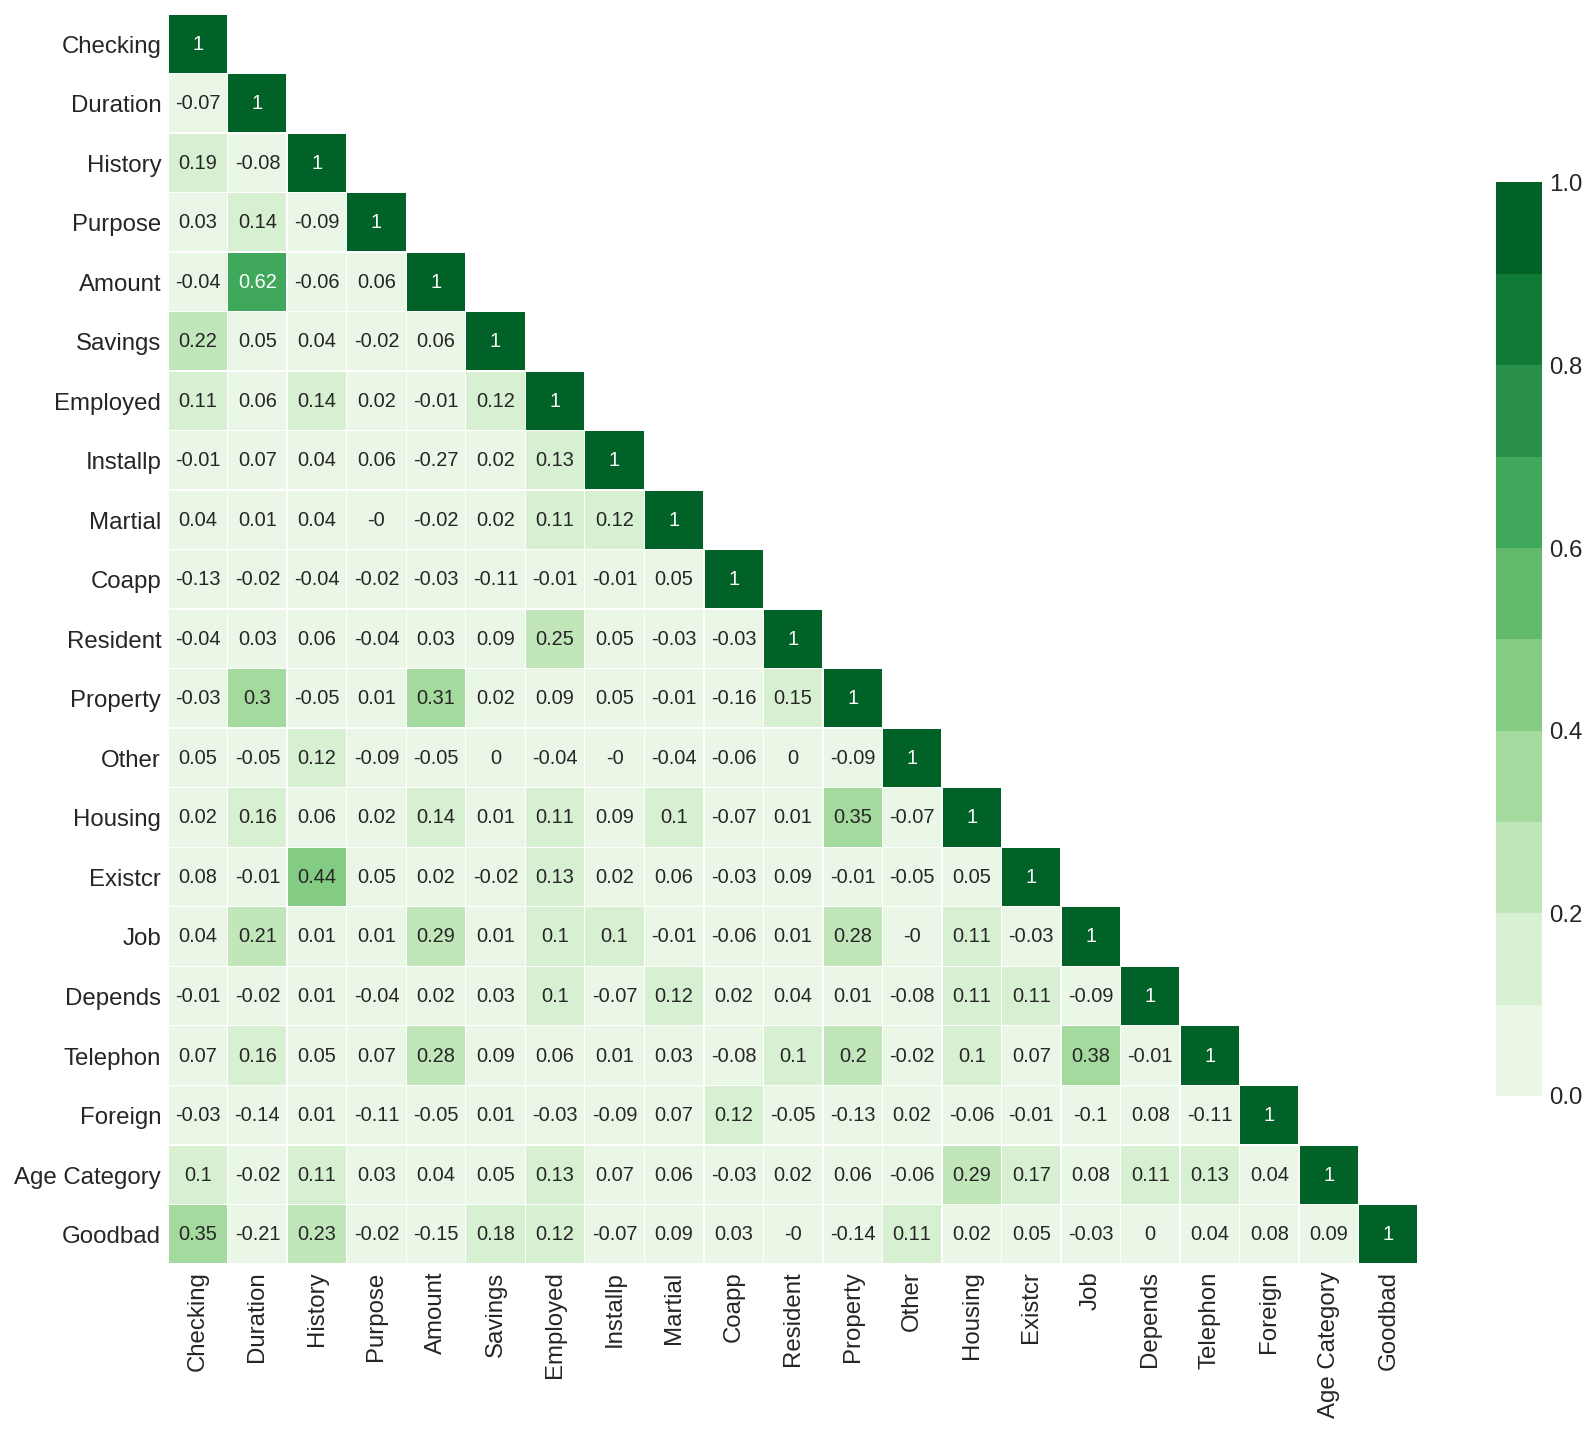

In [29]:
Temp = pd.DataFrame(X, columns = df.drop(columns = [Target]).columns)
Temp[Target] = y

def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr().round(2)
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("Greens", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": .6})

Correlation_Plot (Temp, 14)

In [51]:
Y = pd.get_dummies(Data[Target]).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=1)

pd.DataFrame(data={'Set':['X_train','X_val', 'X_test','Y_train','Y_val','Y_test'],
               'Shape':[X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape]}).set_index('Set').T

Set,X_train,X_val,X_test,Y_train,Y_val,Y_test
Shape,"(640, 20)","(160, 20)","(200, 20)","(640, 2)","(160, 2)","(200, 2)"


In [40]:
from keras.models import Sequential
from keras import regularizers
from keras import optimizers
from keras.layers import Dense, Dropout

In [102]:
model = Sequential()
model.add(Dense(12, input_dim= X.shape[1], kernel_initializer='glorot_normal', bias_initializer='zeros', activation='relu'))
model.add(Dense(10, kernel_initializer='glorot_normal', bias_initializer='zeros', activation='sigmoid'))
model.add(Dense(4, kernel_initializer='glorot_normal', bias_initializer='zeros', activation='sigmoid'))
model.add(Dense(Y.shape[1], kernel_initializer='glorot_normal', bias_initializer='zeros', activation='sigmoid'))
# Number of iterations
IT = int(2e3)+1
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy','mae', 'mse'])

# Train model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val) ,epochs= IT, batch_size=50,  verbose=0)



In [103]:
# Predications and Score
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test) 

7/7 [==============================] - 0s 2ms/step - loss: 0.7210 - accuracy: 0.7250 - mae: 0.3727 - mse: 0.1994


In [104]:
score = pd.DataFrame(score, index = model.metrics_names).T
history = pd.DataFrame(history.history)
display(score.style.hide_index())

loss,accuracy,mae,mse
0.721036,0.725000,0.372709,0.199442


In [90]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= history.index.values, y= history['loss'].values, line=dict(color='OrangeRed', width= 1.5), 
                         name = 'Loss'))
fig.add_trace(go.Scatter(x= history.index.values, y= history['accuracy'].values, line=dict(color='MidnightBlue', width= 1.5), 
                         name = 'Accuracy'))
fig.add_trace(go.Scatter(x= history.index.values, y= history['mae'].values, line=dict(color='ForestGreen', width= 1.5), 
                         name = 'Mean Absolute Error (MAE)'))
fig.add_trace(go.Scatter(x= history.index.values, y= history['mse'].values, line=dict(color='purple', width= 1.5), 
                         name = 'Mean Squared Error (MSE)'))
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=12))
fig.update_layout(dragmode='select', plot_bgcolor= 'white', height=600, hovermode='closest')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Lightgray')
fig.update_xaxes(showline=True, linewidth=1, linecolor='Lightgray', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='Lightgray', mirror=True)
fig['layout']['xaxis'].update(range=[0, history.index.values.max()])
fig['layout']['yaxis'].update(range=[0, 1.0])
fig.show()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 12)                252       
_________________________________________________________________
dense_119 (Dense)            (None, 10)                130       
_________________________________________________________________
dense_120 (Dense)            (None, 4)                 44        
_________________________________________________________________
dense_121 (Dense)            (None, 2)                 10        
Total params: 436
Trainable params: 436
Non-trainable params: 0
_________________________________________________________________


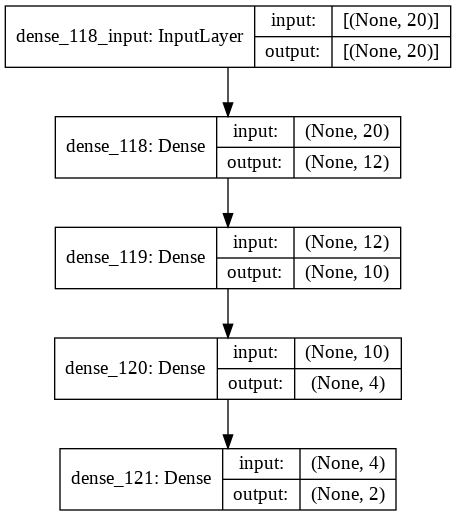

In [105]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested = True)

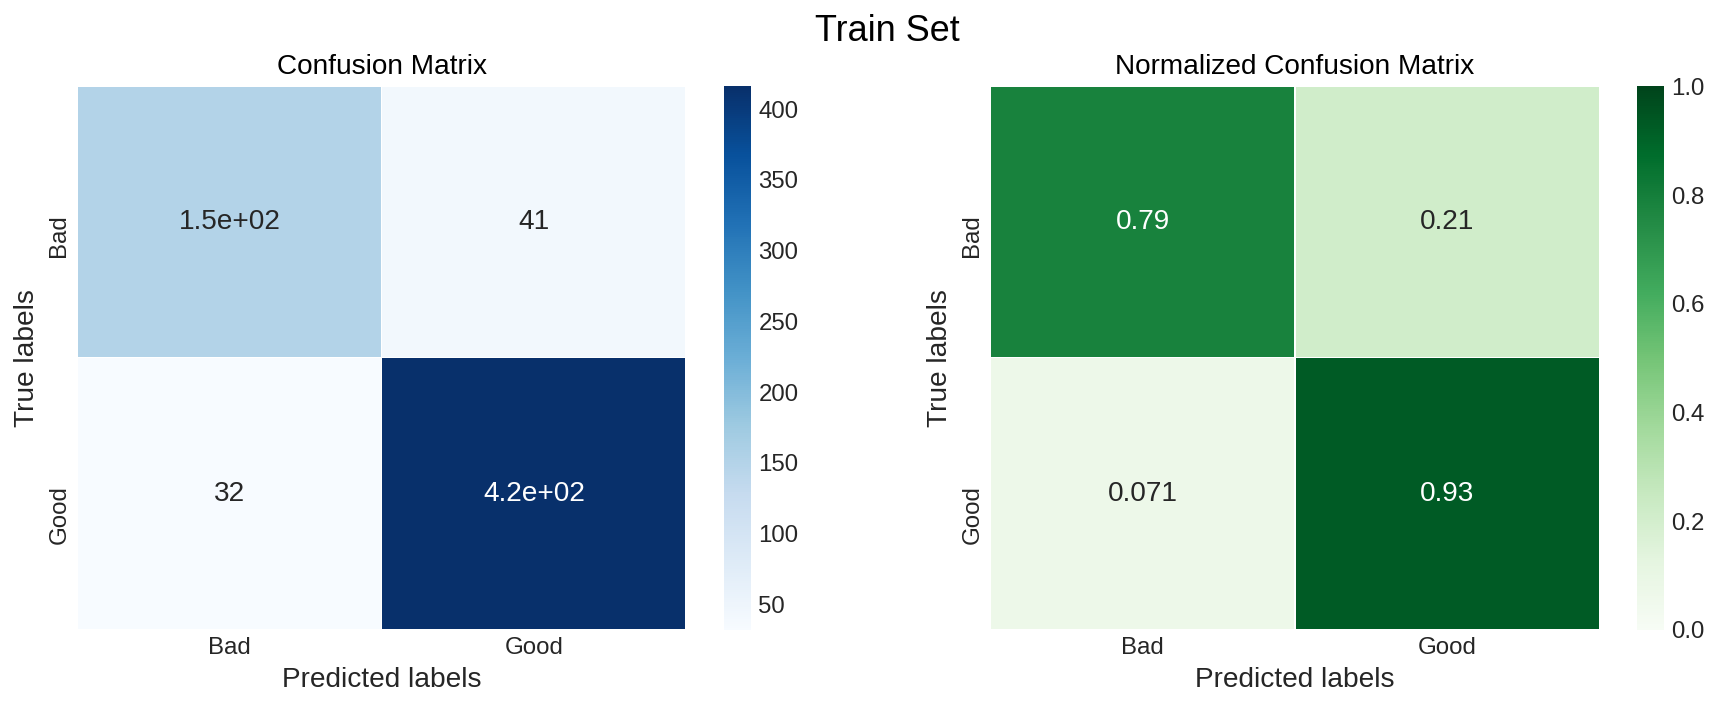

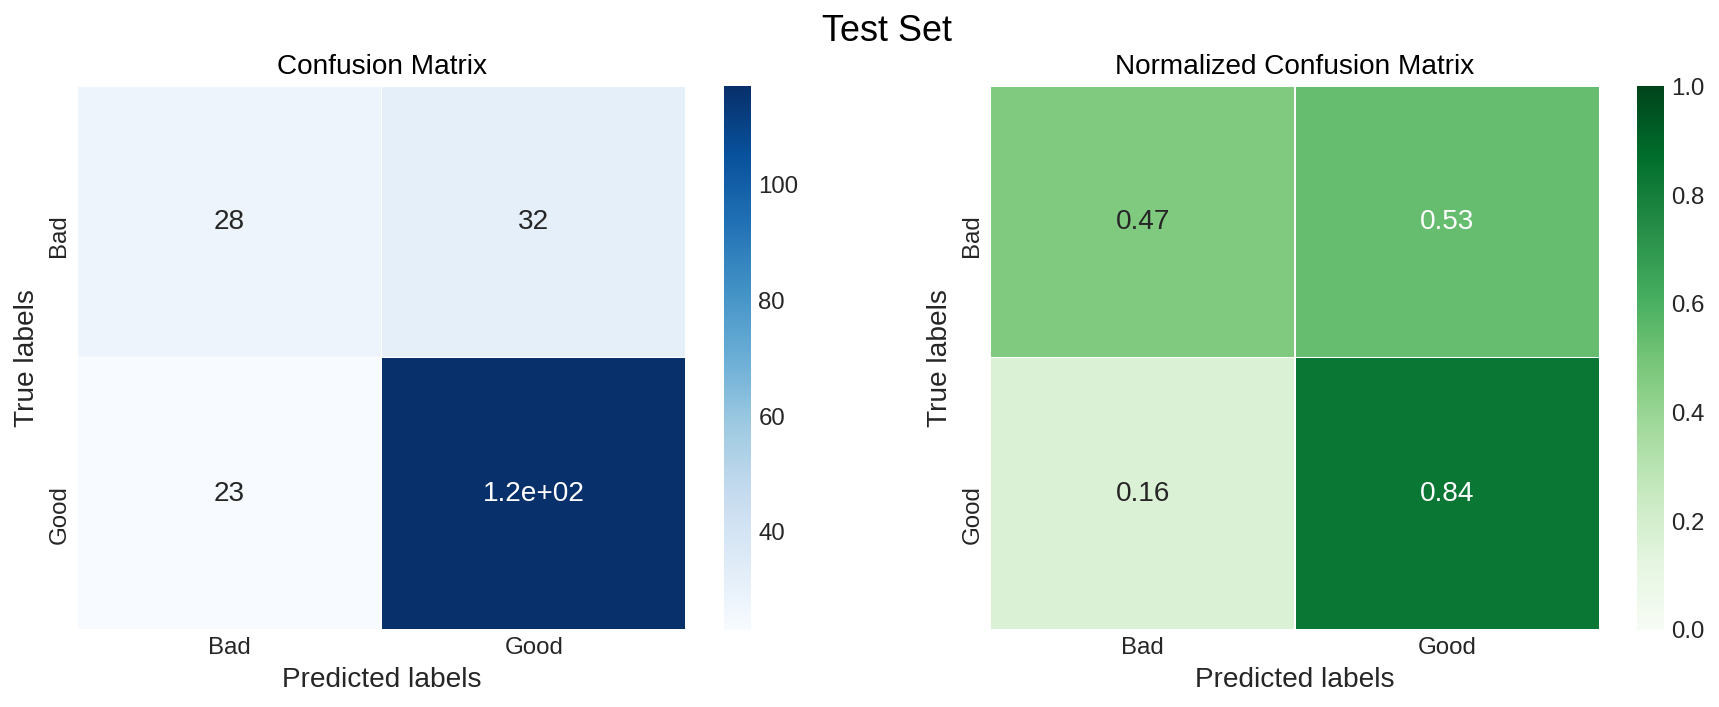

In [106]:
Labels = Y.columns.tolist()
# Train set
Y_pred = model.predict(X_train)
Confusion_Matrix = confusion_matrix(Y_train.values.argmax(axis=1), y_pred.argmax(axis=1))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Train Set', fontsize = 18)
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Blues", ax = ax[0],
               linewidths = 0.2, cbar_kws={"shrink": 1})
_ = ax[0].set_xlabel('Predicted labels')
_ = ax[0].set_ylabel('True labels'); 
_ = ax[0].set_title('Confusion Matrix');
_ = ax[0].xaxis.set_ticklabels(Labels)
_ = ax[0].yaxis.set_ticklabels(Labels)

Confusion_Matrix = Confusion_Matrix.astype('float') / Confusion_Matrix.sum(axis=1)[:, np.newaxis]
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Greens", ax = ax[1],
               linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": 1})
_ = ax[1].set_xlabel('Predicted labels')
_ = ax[1].set_ylabel('True labels'); 
_ = ax[1].set_title('Normalized Confusion Matrix');
_ = ax[1].xaxis.set_ticklabels(Labels)
_ = ax[1].yaxis.set_ticklabels(Labels)

# Test set
Y_pred = model.predict(X_test)
Confusion_Matrix = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred.argmax(axis=1))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Test Set', fontsize = 18)
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Blues", ax = ax[0],
                linewidths = 0.2, cbar_kws={"shrink": 1})
_ = ax[0].set_xlabel('Predicted labels')
_ = ax[0].set_ylabel('True labels'); 
_ = ax[0].set_title('Confusion Matrix');
_ = ax[0].xaxis.set_ticklabels(Labels)
_ = ax[0].yaxis.set_ticklabels(Labels)

Confusion_Matrix = Confusion_Matrix.astype('float') / Confusion_Matrix.sum(axis=1)[:, np.newaxis]
_ = sns.heatmap(Confusion_Matrix, annot=True, annot_kws={"size": 14}, cmap="Greens", ax = ax[1],
               linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": 1})
_ = ax[1].set_xlabel('Predicted labels')
_ = ax[1].set_ylabel('True labels'); 
_ = ax[1].set_title('Normalized Confusion Matrix');
_ = ax[1].xaxis.set_ticklabels(Labels)
_ = ax[1].yaxis.set_ticklabels(Labels)